## Forecast Range, Accuracy and Various Requirements

#### Note: The forecasting techniques and model evaluation parameters will be covered in great detail in the upcoming weeks. The following lines of theoretical information is just to give you an introduction to Forecasting.

Time Series forecast models can both make predictions and provide a confidence interval for those predictions. 

### Forecast Range


**Confidence intervals provide an upper and lower expectation for the real observation. **

These are useful for assessing the range of real possible outcomes for a prediction and for better understanding the skill of the model.

For example, the ARIMA implementation in the statsmodel python library can be used to fit an ARIMA model. It returns an ARIMAResults object. 

The object provides the forecast() function returns three values:
* 1) Forecast: The forecasted value in the 
* 2) Standard Error of the model: 
* 3) Confidence Interval: The 95% confidence interval for the forecast


### Forecast Accuracy


The error in the forecast is the difference between the actual value and the forecast.

Two popular accuracy measures are RMSE and MAPE.

### Forecast  Requirements

A time series model must contain a key time column that contains unique values, input columns, and at least one predictable column.


Time series data often requires cleaning, scaling, and even transformation

**Frequency:** Data may be provided at a frequency that is too high to model or is unvenly spread through time requiring  resampling for use in models.

**Outliers:** Data may contain corrupt or extreme outlier values that need to be identified and handled.

**Frequency:**

* Frequencies may be too granular or not granular enough to get insights.
* The pandas library in Pyhton provides the capability to increase or decrease the sampling frequency of the time series data.

**Resampling:**

* Resampling may be required if the data is not available at the same frequency that you want to make predictions.
* Resampling may be required to provide additional structure or insight into the learning problem for supervised learning models.

**Up-sampling**
* Increase the frequencies of the sample, example: months to days
* Care may be needed in deciding how the fine-grained observations are calculated using interpolation.

* The function, resample() available in the pandas library works on the Series and DataFrame objects.
* This can be used to group records when down-sampling and make space for new observations when up-sampling.

### Example 12

**Up-sampling frequency**

* The observations in the Shampoo Sales are monthly. We need to up-sample the frequency from monthly to daily and use an interpolation scheme to fill in the new daily frequency.

* We can use this function to transform our monthly dataset into a daily dataset by calling resampling and specifying preferred frequency of calendar day frequency or D.

In [5]:
#upsample to daily sales
from   pandas            import read_csv
# from     pandas                   import datetime #this particular submodule from pandas will be deprecated in future
# versions, thus the next line of code
from     datetime                 import datetime
import matplotlib.pyplot as     plt

def parser(x):
       return datetime.strptime('190'+x, '%Y-%m')

tseries = read_csv('D:/Academic Operations/DSBA - Python/Online/Time Series Forecasting/Abhinanda Sir/Video Materials/Week 1/shampoo-sales.csv', header = 0, index_col = 0, parse_dates = True, 
                               squeeze = True, date_parser = parser)

upsampled_ts = tseries.resample('D').mean()
print(upsampled_ts .head(36))

Month
1901-01-01    266.0
1901-01-02      NaN
1901-01-03      NaN
1901-01-04      NaN
1901-01-05      NaN
1901-01-06      NaN
1901-01-07      NaN
1901-01-08      NaN
1901-01-09      NaN
1901-01-10      NaN
1901-01-11      NaN
1901-01-12      NaN
1901-01-13      NaN
1901-01-14      NaN
1901-01-15      NaN
1901-01-16      NaN
1901-01-17      NaN
1901-01-18      NaN
1901-01-19      NaN
1901-01-20      NaN
1901-01-21      NaN
1901-01-22      NaN
1901-01-23      NaN
1901-01-24      NaN
1901-01-25      NaN
1901-01-26      NaN
1901-01-27      NaN
1901-01-28      NaN
1901-01-29      NaN
1901-01-30      NaN
1901-01-31      NaN
1901-02-01    145.9
1901-02-02      NaN
1901-02-03      NaN
1901-02-04      NaN
1901-02-05      NaN
Freq: D, Name: Sales, dtype: float64


### Inference

We observe that the resample() function has created the rows by putting NaN values as new values for dates other than day 01. 

Next we can interpolate the missing  values at this new frequency. The function, interpolate() of pandas library is used to interpolate the missing values. 
We use a linear interpolation which draws a straight line between available data, on the first day of the month and fills in values at the chosen frequency from this line. 


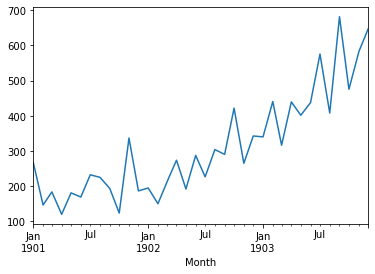

In [6]:
interpolated = upsampled_ts.interpolate(method = 'linear')
interpolated.plot()
plt.show()

**Another common interpolation**

* Another common interpolation method is to use a polynomial or a spline to connect the values.
This creates more curves and look more natural on many datasets.
* Using a spline interpolation requires you specify the order (count of terms in the polynomial). Here, we are using 2.

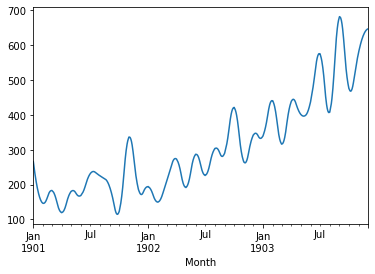

In [7]:
interpolated1 = upsampled_ts.interpolate(method = 'spline', order = 2)
interpolated1.plot()
plt.show()

In [8]:
print(interpolated1.head(12))

Month
1901-01-01    266.000000
1901-01-02    258.630160
1901-01-03    251.560886
1901-01-04    244.720748
1901-01-05    238.109746
1901-01-06    231.727880
1901-01-07    225.575149
1901-01-08    219.651553
1901-01-09    213.957094
1901-01-10    208.491770
1901-01-11    203.255582
1901-01-12    198.248529
Freq: D, Name: Sales, dtype: float64


### Example 13

**Down-sampling Frequency**

* The sales data is monthly, but we prefer the data to be quarterly. The year can be divided into 4 business quarters, 3 months a piece. 
* The resample() function will group all observations by the new frequency.
* We need to decide how to create a new quarterly value from each group of 3 records. We shall use the mean() function to calculate the average monthly sales numbers for the quarter

Month
1901-03-31    198.333333
1901-06-30    156.033333
1901-09-30    216.366667
1901-12-31    215.100000
1902-03-31    184.633333
Freq: Q-DEC, Name: Sales, dtype: float64


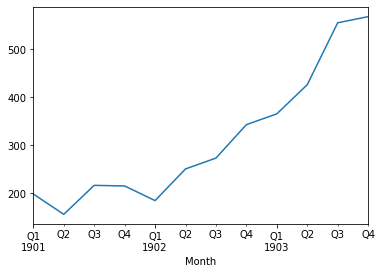

In [9]:
resample             = tseries.resample('Q')
quarterly_mean_sales = resample.mean()
print(quarterly_mean_sales.head())
quarterly_mean_sales.plot()
plt.show()

### Example 14

We can turn monthly data into yearly data. Down-sample the data using the alias, A for year-end frequency and this time use sum to calculate the total sales each year.

Month
1901-12-31    2357.5
1902-12-31    3153.5
1903-12-31    5742.6
Freq: A-DEC, Name: Sales, dtype: float64


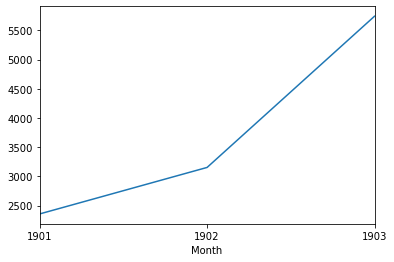

In [10]:
resample = tseries.resample('A')
yearly_mean_sales = resample.sum()
print(yearly_mean_sales.head() )
yearly_mean_sales.plot()
plt.show()

**Outliers**
Data may contain corrupt or extreme outlier values that need to be identified and handled.

####  Detection of outliers in time series is difficult.
* If a trend is present in the data, then usual method of detecting outliers by boxplot may not work.
* If seasonality is present in the data, one particular season's data may be too small or too large compared to others.

#### Decomposition helps in identifying unsual observations

* If trend and seasonality are not adequate to explain the observation

#### Outliers cannot be eliminated - they need to be imputed as closely as possible by using the knowledge gained from decomposition.

# END